# Lipidoma

## Read data set 
On the raw we have the features, while on the column we have the samples.

However, I set the features on the column and the samples on the raw.

In [27]:
import pandas as pd
import numpy as np

data_lipidoma_transpose = pd.read_excel("../DataSet PAscale/Lipidoma.xlsx")

data_lipidoma = data_lipidoma_transpose.T

data_lipidoma.columns = data_lipidoma_transpose["Name"]

data_lipidoma = data_lipidoma.iloc[1:]

data_lipidoma.columns = ["Label"] + list(data_lipidoma.columns[1:])

df_y_lipidoma = data_lipidoma["Label"].iloc[1:]

df_y_qc_lipidoma = data_lipidoma["Label"].iloc[1:8]

mz_lipidoma = data_lipidoma.iloc[0:1,1:]

df_x_lipidoma = data_lipidoma.iloc[1:,1:]

df_qc_lipidoma = data_lipidoma.iloc[1:8,1:]

name_samples_lipidoma = df_x_lipidoma.transpose().columns

df_x_lipidoma

,CE 16:0,CE 16:1,CE 18:1,CE 18:2,CE 20:3,CE 20:4,CE 20:5,Cer 16:1;2O/22:0,Cer 18:1;2O/22:0,Cer 18:1;2O/23:0,...,TG 18:1_18:1_20:1,TG 18:1_18:1_20:4,TG 18:1_18:2_18:2,TG 18:1_18:2_20:4,TG 18:1_18:2_22:0,TG 18:1_18:2_24:0,TG 18:2_18:2_18:2,TG 18:2_18:2_20:0,TG 18:2_18:2_22:0,TG O-18:1_16:0_18:1
150522_QC 2_POS_RD3_1_4915,0.330046,0.280519,2.540679,10.640863,0.560636,2.403751,0.157257,0.009157,0.049669,0.045704,...,0.048419,0.216057,0.374602,0.128683,0.006091,0.00187,0.11348,0.081128,0.0079,0.005323
150522_QC 2_POS_RD3_1_4916,NaN,0.451638,NaN,12.096138,0.600185,3.066643,0.16019,0.011156,0.052369,0.053336,...,0.048786,0.238226,0.371836,0.143209,0.006248,0.002391,0.113523,0.088165,0.007748,NaN
150522_QC_POS_BA2_1_4678,0.217226,0.660418,2.188865,19.737975,0.902996,5.096119,0.375479,0.008749,0.04877,0.041709,...,NaN,0.194203,0.425828,0.150387,0.00583,0.001822,0.129144,0.077688,0.004856,0.006641
150522_QC_POS_BA2_1_4679,0.24431,0.395862,2.374355,10.277491,0.48138,2.38088,0.174221,0.007789,0.043779,0.041169,...,0.052236,0.202469,0.413477,0.141975,0.006259,0.002188,0.123501,0.063008,0.005009,0.00864
150522_QC_POS_BA2_1_4680,0.259228,0.343388,2.191119,9.896434,0.421994,2.144002,0.084034,0.006702,0.038995,0.038542,...,0.051265,0.206049,0.424743,0.146191,0.006052,0.00197,0.12741,0.100133,0.004539,0.00772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC 19_M,0.321473,0.369594,2.94805,24.193067,0.864314,5.183349,0.565892,0.023624,0.112769,0.097707,...,0.030067,0.232738,0.719923,0.154853,0.005753,0.00163,0.175301,0.055449,0.006507,0.007088
HC 21_M,0.261614,0.480679,2.599515,10.807497,0.660797,1.732404,0.084998,0.012143,0.041101,0.036411,...,0.050221,0.155939,0.292474,0.079288,0.007948,0.001621,0.080277,0.083346,0.004616,0.007494
HC 22_M,0.312295,0.505954,4.053028,17.093651,0.837622,3.822791,0.515278,0.013383,0.064994,0.068863,...,0.03194,0.171667,0.266106,0.175584,0.003274,0.001061,0.042257,0.049565,0.00582,0.003099
HC 20_M,0.317264,0.396458,2.96421,11.487462,0.614516,2.62753,0.117277,0.009959,0.057988,0.054172,...,0.036462,0.269189,0.609648,0.154819,0.00536,0.00192,0.17339,0.09585,0.004326,0.002696


In [28]:
# color mapping to use in plot
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange',
    'QC' : 'purple'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

## View the data
I made a scatter plot with M/Z on the x-axis and intensity on y-axis.

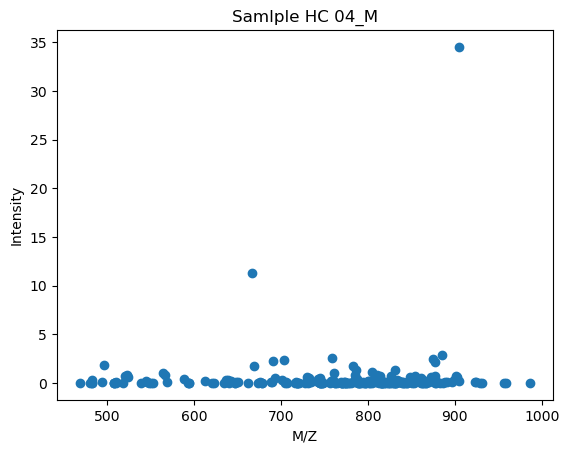

HC 04_M    34.537804
dtype: object


In [29]:
import matplotlib.pyplot as plt

plt.scatter(mz_lipidoma, df_x_lipidoma.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 04_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
print(df_x_lipidoma[89:90].max(axis=1))


In [30]:
df_x_lipidoma_original = df_x_lipidoma.copy()
for column in df_x_lipidoma.columns:
    df_x_lipidoma.loc[:,column] = df_x_lipidoma[column].fillna((np.nanmin(df_x_lipidoma[column]))/5)
print(df_x_lipidoma.isna().sum().sort_values(ascending=False))

CE 16:0                0
SM 18:2;2O/16:0        0
PE 18:0_18:1           0
PE 18:0_18:2           0
PE 18:2_18:0           0
                      ..
PC 16:1_18:2_B         0
PC 17:0_16:2           0
PC 17:0_17:0           0
PC 17:0_18:1           0
TG O-18:1_16:0_18:1    0
Length: 226, dtype: int64


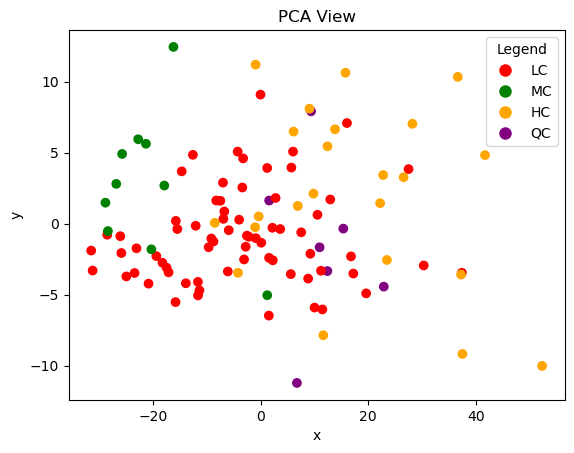

In [31]:
from sklearn.decomposition import PCA
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_lipidoma,df_y_lipidoma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

LDA

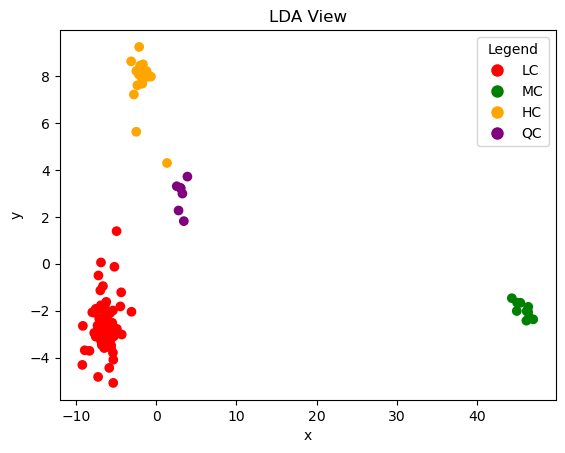

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_fit_tic = LDA(n_components=2)
lda_scores = lda_fit_tic.fit_transform(df_x_lipidoma,df_y_lipidoma)

plt.scatter(lda_scores[:, 0], lda_scores[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('LDA View')
plt.show()

## Drop Outlier

In [33]:
drop = []

LC

In [34]:
## codice prova con la distanza di mahalonobis
lc = scores_view[7:76,:]
lc
mean_lc = np.mean(lc,axis=0)
cov_matrix = np.cov(lc,rowvar=False)

mahalanobis_distance_lc = []

for point in lc:
    diff = point - mean_lc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_lc.append(distance)
    
# print(mahalanobis_distance_lc)

outlier_lc = pd.DataFrame({"Sample":df_x_lipidoma.index[7:76],"outlier":mahalanobis_distance_lc}).sort_values(by="outlier",ascending=False)
outlier_lc

,Sample,outlier
19,LC 323_M,3.042468
51,LC 399_M,3.033468
13,LC307_M,2.680860
4,LC 241a_M,2.503711
1,LC 235a_M,2.483392
...,...,...
9,LC 270_M,0.237452
28,LC 350_M,0.210871
17,LC 320_M,0.208930
15,LC 315_M,0.116350


In [35]:
from scipy.stats import chi2

alpha = 0.05
threshold_distance_mahalanobis = chi2.ppf(1 - alpha, df = 2)
threshold_distance_mahalanobis

5.991464547107979

In [36]:
mean_out_lc = outlier_lc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_lc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_lc = outlier_lc.drop(outlier_lc[outlier_lc["Sample"].isin(temp)].index)

drop

[]

MC

In [37]:
mc = scores_view[76:86,:]

mean_mc = np.mean(mc,axis=0)
cov_matrix = np.cov(mc,rowvar=False)

mahalanobis_distance_mc = []

for point in mc:
    diff = point - mean_mc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_mc.append(distance)

outlier_mc = pd.DataFrame({"Sample":df_x_lipidoma.index[76:86],"outlier":mahalanobis_distance_mc}).sort_values(by="outlier",ascending=False)
outlier_mc

,Sample,outlier
7,MC 15_M,2.655762
2,MC 09_M,2.288592
4,MC 11_M,1.323139
0,MC 04_M,1.089465
5,MC 13_M,0.994129
6,MC 14_M,0.728807
8,MC 17_M,0.640775
3,MC 10_M,0.630791
9,MC 18_M,0.582218
1,MC 05_M,0.323616


In [38]:
mean_out_mc = outlier_mc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_mc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)
        
outlier_mc = outlier_mc.drop(outlier_mc[outlier_mc["Sample"].isin(temp)].index)

drop

[]

HC

In [39]:
hc = scores_view[86:,:]

mean_hc = np.mean(hc,axis=0)
cov_matrix = np.cov(hc,rowvar=False)

mahalanobis_distance_hc = []

for point in hc:
    diff = point - mean_hc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_hc.append(distance)

outlier_hc = pd.DataFrame({"Sample":df_x_lipidoma.index[86:],"outlier":mahalanobis_distance_hc}).sort_values(by="outlier",ascending=False)
outlier_hc

,Sample,outlier
9,HC 10_M,2.629989
12,HC 13_M,2.060246
14,HC 15_M,2.016726
0,HC 01_M,1.808608
2,HC 03_M,1.778554
16,HC 17_M,1.736347
10,HC 11_M,1.710193
11,HC 12_M,1.708444
18,HC 19_M,1.436505
7,HC 08_M,1.384980


In [40]:
mean_out_hc = outlier_hc["outlier"].mean(axis=0)

temp = []
for sample,elem in outlier_hc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_hc = outlier_hc.drop(outlier_hc[outlier_hc["Sample"].isin(temp)].index) 
drop

[]

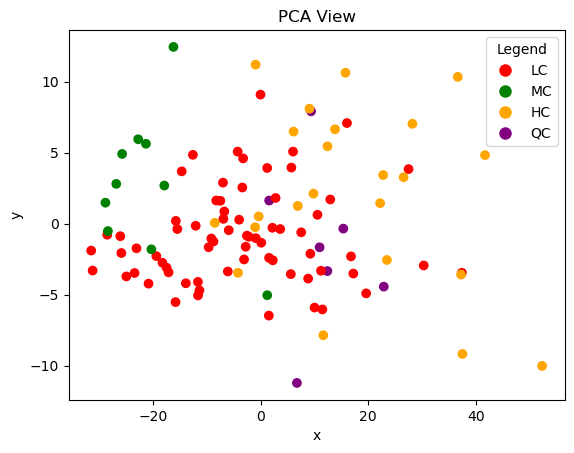

In [41]:
df_score_view = pd.DataFrame({"Sample":df_x_lipidoma.index,"Score View X":scores_view[:,0], "Score View Y":scores_view[:,1]})

index_drop = df_score_view[df_score_view["Sample"].isin(drop)].index
colors_after_drop = np.delete(colors,index_drop)
df_score_view = df_score_view.drop(index_drop)
df_score_view

plt.scatter(df_score_view["Score View X"], df_score_view["Score View Y"], c=colors_after_drop)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

## Define X and Y

Label
LC    69
HC    23
MC    10
Name: count, dtype: int64
Label
LC    69
HC    23
MC    10
Name: count, dtype: int64


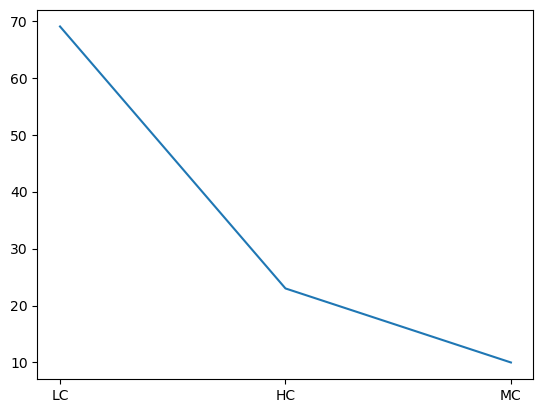

In [42]:
df_x_lipidoma_noqc = df_x_lipidoma.iloc[7:]
df_y_lipidoma_noqc = df_y_lipidoma.iloc[7:]

print(df_y_lipidoma_noqc.value_counts())

df_score_view_noqc = df_score_view.drop([0,1,2,3,4,5,6])

x = df_x_lipidoma_noqc.copy()
y = df_y_lipidoma_noqc.copy()

x = x.drop(drop)
y = y.drop(drop)

name_samples = x.transpose().columns

print(y.value_counts())
plt.plot(y.value_counts())
plt.show()

### Save mean and std

In [43]:
mean= x.mean(axis=0)
std = x.std(axis=0)

x = (x.sub(mean,axis=1)).div(std,axis=1)

## PCA

### Elbow Graph

In [44]:
from sklearn.decomposition import PCA

varianza_spiegata = []
n_componenti = np.arange(1, 53)

for n in n_componenti:
    pca_elbow = PCA(n_components=n)
    pca_elbow.fit(x)
    varianza_spiegata.append(np.sum(pca_elbow.explained_variance_ratio_))

Find the maximum distance between rope and elbow graph

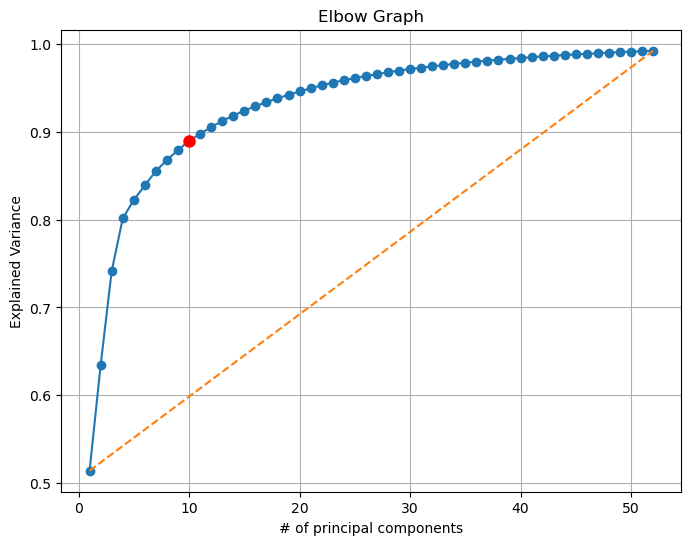

10

In [45]:
from scipy.spatial.distance import euclidean

points = np.array(list(zip(n_componenti,varianza_spiegata)))
points

first_point = points[0]
last_point = points[-1]

chord_length = euclidean(first_point, last_point)
distances = []
for point in points:
    distance = np.abs(np.cross(last_point - first_point, first_point - point)) / chord_length
    distances.append(distance)

max_distance_index = np.argmax(distances)
points[max_distance_index][0]
num_components_pca = int(points[max_distance_index][0])

plt.figure(figsize=(8, 6))
plt.plot(n_componenti, varianza_spiegata, marker='o')
plt.plot([1,len(varianza_spiegata)],[varianza_spiegata[0],varianza_spiegata[-1]], linestyle='--', label="Rope")
plt.plot(points[max_distance_index][0],points[max_distance_index][1], marker='o', markersize=8, color="red", label="Optimal Components")
plt.xlabel('# of principal components')
plt.ylabel('Explained Variance')
plt.title('Elbow Graph')
plt.grid(True)
plt.show()

num_components_pca

#### PCA

In [46]:
pca = PCA(n_components=num_components_pca)
pca_fit = pca.fit(x)
x_pca = pca_fit.transform(x)
x_pca

array([[ 2.89282694,  1.20373532, -1.11405072, ..., -0.53072499,
        -0.28591947,  1.68492436],
       [27.50548804, -5.39174572, -6.94397905, ..., -0.89600279,
         5.90576933,  1.87016529],
       [14.19410957, -1.29484303, -3.50229643, ..., -1.19032824,
         4.85633761,  0.6281163 ],
       ...,
       [14.18341849, -0.4816633 , -4.60582327, ...,  2.23000637,
         2.84726202,  0.57020575],
       [ 5.76725418, -1.7990272 , -0.40212185, ..., -1.98881171,
        -0.79504963, -0.39051264],
       [19.17180689,  1.24218437,  0.5156212 , ..., -0.99705924,
         1.17368814, -0.82072641]])

### Prepare data set

In [47]:
from imblearn.over_sampling import BorderlineSMOTE
X_w = pd.DataFrame(x_pca)
Y_w = y

X_w.columns = [f'PC{i}' for i in range(X_w.shape[1])]
X_w = X_w.transpose()
X_w.columns = name_samples
X_w = X_w.transpose()

all_performance = []

#ribilanciamento
bls = BorderlineSMOTE(random_state=99)
x_r,y_r = bls.fit_resample(X_w,Y_w)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model = LogisticRegression(penalty=None,class_weight='balanced', multi_class='auto',max_iter=10000, n_jobs=4, solver='saga') # penalty{‘l1’, ‘l2’, ‘elasticnet’, None}; multi_class{‘auto’, ‘ovr’, ‘multinomial’}
LogisticRegression_model.fit(x_r, y_r)

LogisticRegression_model

LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=4,
                   penalty=None, solver='saga')

### SVM

In [49]:
from sklearn.svm import SVC

SVC_model = SVC(C=1.0,kernel="linear", gamma="scale")
SVC_model.fit(x_r,y_r)
SVC_model

SVC(kernel='linear')

### Random Forests

In [50]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=200, random_state=3, max_depth=22, n_jobs=4)
RandomForest_model.fit(x_r, y_r)
RandomForest_model

RandomForestClassifier(max_depth=22, n_estimators=200, n_jobs=4, random_state=3)

## Analyze the model

#### Logistic Regression

In [51]:
features_importance = pd.DataFrame({"PC": LogisticRegression_model.feature_names_in_, "Coefficient": abs(LogisticRegression_model.coef_[0])})

name_pc = features_importance.T.columns

features_imp_original = pd.DataFrame({"Feature": x.columns,**{f"PC{i}":abs(pca_fit.components_[i])for i in name_pc}})
features_imp_original
temp = features_imp_original.T
temp.columns = x.columns
temp_2 = temp.T
features_imp_original = temp_2.iloc[:,1:]

out_logistic_regression = np.dot(features_imp_original,(features_importance["Coefficient"] * pca_fit.explained_variance_ratio_))
out_logistic_regression

most_important_features_lr = pd.DataFrame({"LogisticRegression":out_logistic_regression})
most_important_features_lr.index = features_imp_original.index

most_important_features = pd.DataFrame({"Features":x.columns,"LogisticRegression":out_logistic_regression})
most_important_features

most_important_features_lr

,LogisticRegression
CE 16:0,0.024688
CE 16:1,0.026042
CE 18:1,0.024025
CE 18:2,0.028358
CE 20:3,0.032973
...,...
TG 18:1_18:2_24:0,0.035015
TG 18:2_18:2_18:2,0.020526
TG 18:2_18:2_20:0,0.02439
TG 18:2_18:2_22:0,0.028813


In [52]:
features_imp_original

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
CE 16:0,0.079973,0.022998,0.053053,0.016253,0.038093,0.065748,0.014049,0.004408,0.0098,0.071959
CE 16:1,0.049502,0.03359,0.055413,0.061396,0.037249,0.028608,0.090118,0.088904,0.268676,0.052805
CE 18:1,0.081825,0.00838,0.03917,0.037356,0.013833,0.106761,0.061839,0.01051,0.008672,0.091674
CE 18:2,0.071909,0.030823,0.037941,0.059125,0.047739,0.093641,0.04091,0.064907,0.086979,0.096989
CE 20:3,0.063046,0.070485,0.021244,0.088075,0.024244,0.074222,0.015745,0.046375,0.163651,0.017832
...,...,...,...,...,...,...,...,...,...,...
TG 18:1_18:2_24:0,0.042375,0.103143,0.058055,0.049524,0.010752,0.065058,0.044117,0.078548,0.119747,0.206365
TG 18:2_18:2_18:2,0.04717,0.010305,0.095544,0.027709,0.0136,0.0069,0.032766,0.112999,0.12493,0.156371
TG 18:2_18:2_20:0,0.058703,0.002915,0.107066,0.022568,0.10912,0.01561,0.109735,0.05372,0.103247,0.144605
TG 18:2_18:2_22:0,0.049517,0.029899,0.105932,0.084631,0.036425,0.024818,0.060163,0.012812,0.092011,0.177517


#### SVM

In [53]:
features_importance = pd.DataFrame({"PC": SVC_model.feature_names_in_, "Coefficient": abs(SVC_model.coef_[0])})

features_importance.max(axis=0)

name_pc = features_importance.T.columns

features_imp_original = pd.DataFrame({"Feature": x.columns,**{f"PC{i}":abs(pca_fit.components_[i])for i in name_pc}})

temp = features_imp_original.T
temp.columns = x.columns
temp_2 = temp.T
features_imp_original = temp_2.iloc[:,1:]

out_svm = np.dot(features_imp_original,(features_importance["Coefficient"] * pca_fit.explained_variance_ratio_))
out_svm

most_important_features_svm = pd.DataFrame({"Features":x.columns,"SVM":out_svm})
most_important_features_svm.index = features_imp_original.index

most_important_features["SVM"] = out_svm
most_important_features

,Features,LogisticRegression,SVM
0,CE 16:0,0.024688,0.021082
1,CE 16:1,0.026042,0.022929
2,CE 18:1,0.024025,0.019498
3,CE 18:2,0.028358,0.023946
4,CE 20:3,0.032973,0.029978
...,...,...,...
221,TG 18:1_18:2_24:0,0.035015,0.03475
222,TG 18:2_18:2_18:2,0.020526,0.018075
223,TG 18:2_18:2_20:0,0.02439,0.020261
224,TG 18:2_18:2_22:0,0.028813,0.026013


#### RandomForest

In [54]:
features_importance = pd.DataFrame({"PC": RandomForest_model.feature_names_in_, "Coefficient": (RandomForest_model.feature_importances_)}).sort_values(by="Coefficient",ascending=False)

features_importance

name_pc = features_importance.T.columns

features_imp_original = pd.DataFrame({"Feature": x.columns,**{f"PC{i}":abs(pca_fit.components_[i])for i in name_pc}})

temp = features_imp_original.T
temp.columns = x.columns
temp_2 = temp.T
features_imp_original = temp_2.iloc[:,1:]
features_imp_original

out_random_forest = np.dot(features_imp_original,(features_importance["Coefficient"] * pca_fit.explained_variance_ratio_))
out_random_forest

most_important_features_rf = pd.DataFrame({"Feature": x.columns,"RandomForest":out_random_forest})
most_important_features_rf.index = features_imp_original.index

most_important_features["RandomForest"] = out_random_forest
most_important_features

,Features,LogisticRegression,SVM,RandomForest
0,CE 16:0,0.024688,0.021082,0.005204
1,CE 16:1,0.026042,0.022929,0.007734
2,CE 18:1,0.024025,0.019498,0.003283
3,CE 18:2,0.028358,0.023946,0.007044
4,CE 20:3,0.032973,0.029978,0.013003
...,...,...,...,...
221,TG 18:1_18:2_24:0,0.035015,0.03475,0.017679
222,TG 18:2_18:2_18:2,0.020526,0.018075,0.004257
223,TG 18:2_18:2_20:0,0.02439,0.020261,0.003517
224,TG 18:2_18:2_22:0,0.028813,0.026013,0.008468


# Most Important Features
The list is not in priority order

In [55]:
file_path = "most_important_features.xlsx"
MOST_IMP_RF = most_important_features_rf.sort_values(by="RandomForest", ascending=False).iloc[:20]
MOST_IMP_SVM = most_important_features_svm.sort_values(by="SVM", ascending=False).iloc[:20]
MOST_IMP_LR = most_important_features_lr.sort_values(by="LogisticRegression", ascending=False).iloc[:20]

MOST_IMP_FEATURES = pd.DataFrame({"Features":MOST_IMP_RF.index.intersection(MOST_IMP_SVM.index).intersection(MOST_IMP_LR.index)})
MOST_IMP_FEATURES.to_excel(file_path)

most_important_features_tot = pd.DataFrame({"Feature LG":MOST_IMP_LR.index, "Feature SVM":MOST_IMP_SVM.index, "Feature RF":MOST_IMP_RF.index})
most_important_features_tot.to_excel("most_important_features_tot.xlsx")

MOST_IMP_FEATURES_LIST = MOST_IMP_FEATURES["Features"]
MOST_IMP_FEATURES

,Features
0,PC O-20:1
1,LPC 18:0
2,LPC 18:1_A
3,LPC 16:0
4,LPC 20:2
5,LPC 18:1_B
6,LPC 19:0
7,LPC 20:0
8,LPC 17:0
9,DG 16:0_18:1


## Analisi Univariata

In [56]:
feature_1 = pd.DataFrame(x[MOST_IMP_FEATURES_LIST])
feature_1["Label"] = y.values
MZ = pd.DataFrame(mz_lipidoma[MOST_IMP_FEATURES_LIST])
len(feature_1.index)
MZ

,PC O-20:1,LPC 18:0,LPC 18:1_A,LPC 16:0,LPC 20:2,LPC 18:1_B,LPC 19:0,LPC 20:0,LPC 17:0,DG 16:0_18:1,LPC 17:1,LPC 16:1,LPC 15:0
m/z meas.,550.3865,524.37124,522.3558,496.33988,548.37036,566.34631,538.38687,552.40238,510.35577,612.55579,508.33989,494.32466,482.32461


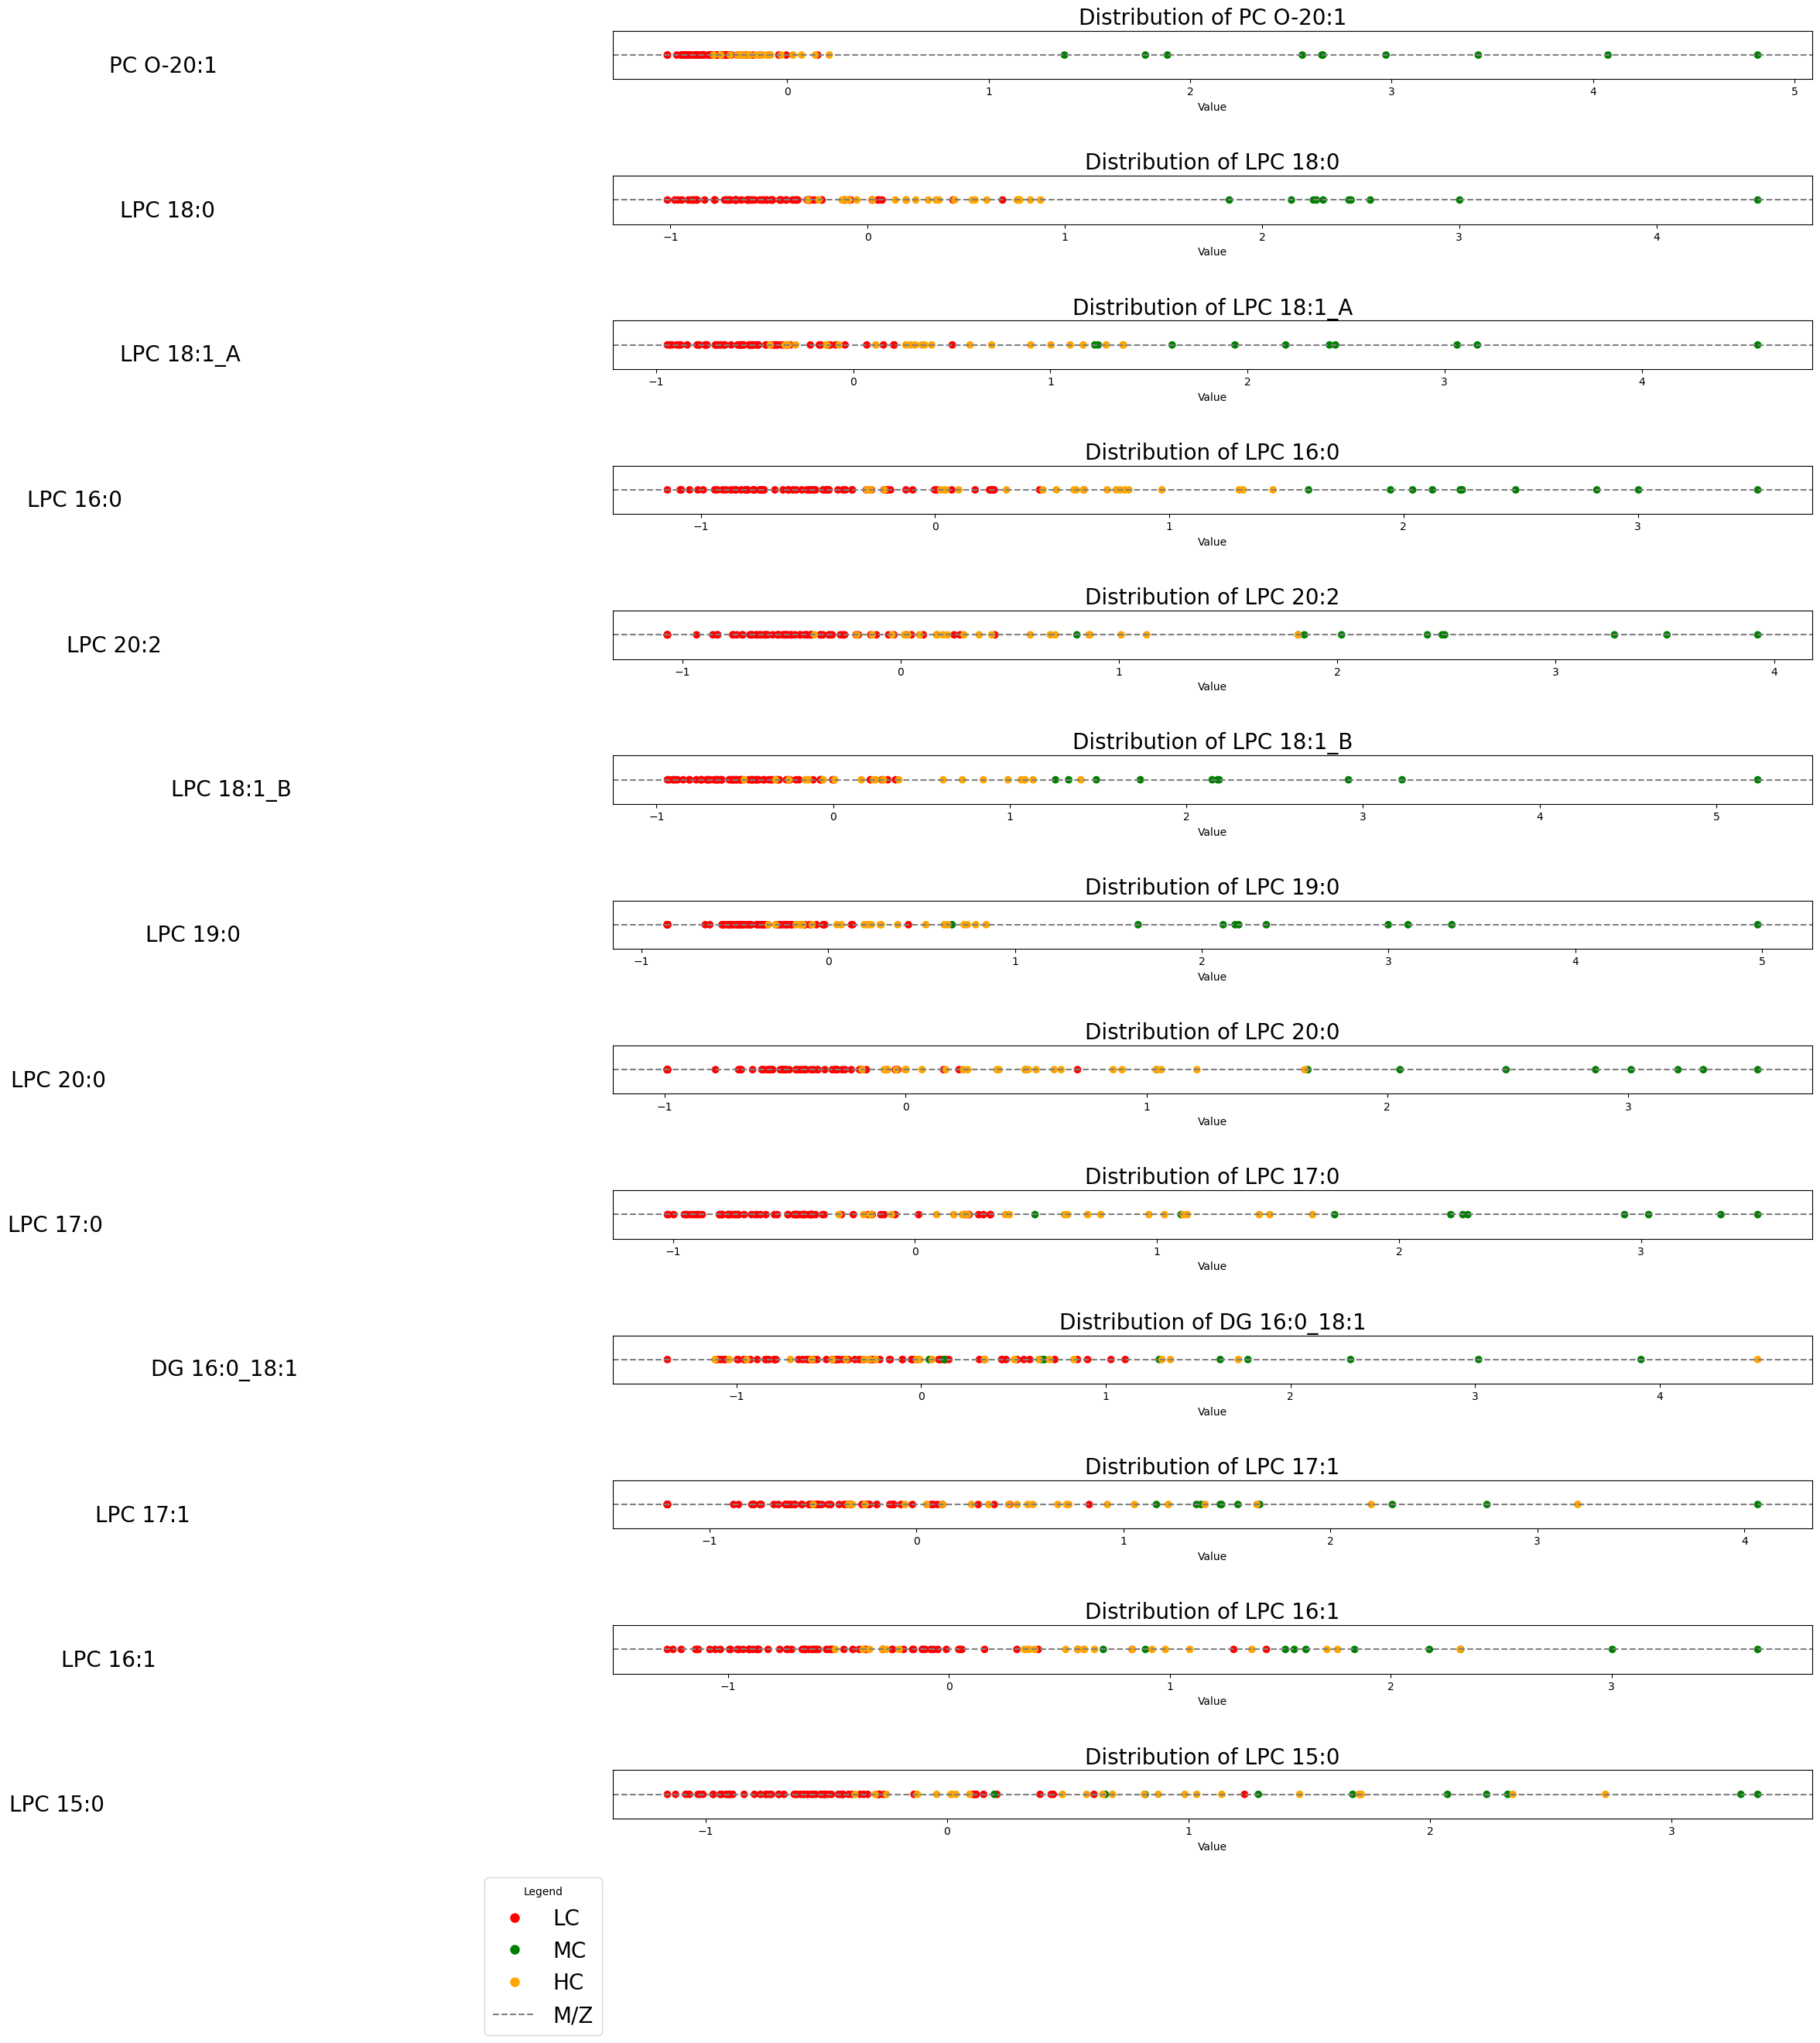

In [57]:
fig, axs = plt.subplots(nrows=len(MOST_IMP_FEATURES_LIST), ncols=1, figsize=(20, 30))

for i, (feature) in enumerate(MOST_IMP_FEATURES_LIST):
    mz = MZ[feature].values
    mz_const = [mz]*len(feature_1.index)
    # Creiamo lo scatter plot per la feature corrente
    axs[i].scatter(feature_1[feature], mz_const, color=[color_mapping[label] for label in feature_1["Label"].values], label='Feature')
    
    # Aggiungiamo una linea orizzontale per il valore costante
    axs[i].axhline(y=mz, color='grey', linestyle='--', label='M/Z')
    axs[i].text(axs[i].get_xlim()[0] - 2.5, mz, feature, color='black', fontsize=20, va = "top")
    
    # Aggiungiamo titoli e legende
    axs[i].set_title(f'Distribution of {feature}', fontsize= 20)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('M/Z')
    plt.subplots_adjust(hspace=2) 
    axs[i].get_yaxis().set_visible(False)
    
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], color='grey', label='M/Z', linestyle='--')
], title='Legend', bbox_to_anchor=(0, -1), loc='upper right', fontsize = 20)
plt.show()